In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def create_multiple_qq_plots(n_samples=100, n_plots=4):
    """
    Create multiple Q-Q plots for different distributions.
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate
    n_plots : int
        Number of plots to create
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # Generate data
    np.random.seed(42)  # for reproducibility
    normal_data = np.random.normal(0, 1, n_samples)
    exp_data = np.random.exponential(1, n_samples)
    unif_data = np.random.uniform(0, 1, n_samples)
    cauchy_data = stats.t.rvs(df=1, size=n_samples)  # t with df=1 is Cauchy
    
    # Create Q-Q plots
    stats.probplot(normal_data, dist="norm", plot=axes[0, 0])
    axes[0, 0].set_title("Normal Q-Q plot: normal data")
    
    stats.probplot(exp_data, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title("Normal Q-Q plot: exponential data")
    
    stats.probplot(unif_data, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title("Normal Q-Q plot: uniform data")
    
    stats.probplot(cauchy_data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title("Normal Q-Q plot: Cauchy data")
    
    plt.tight_layout()
    plt.show()


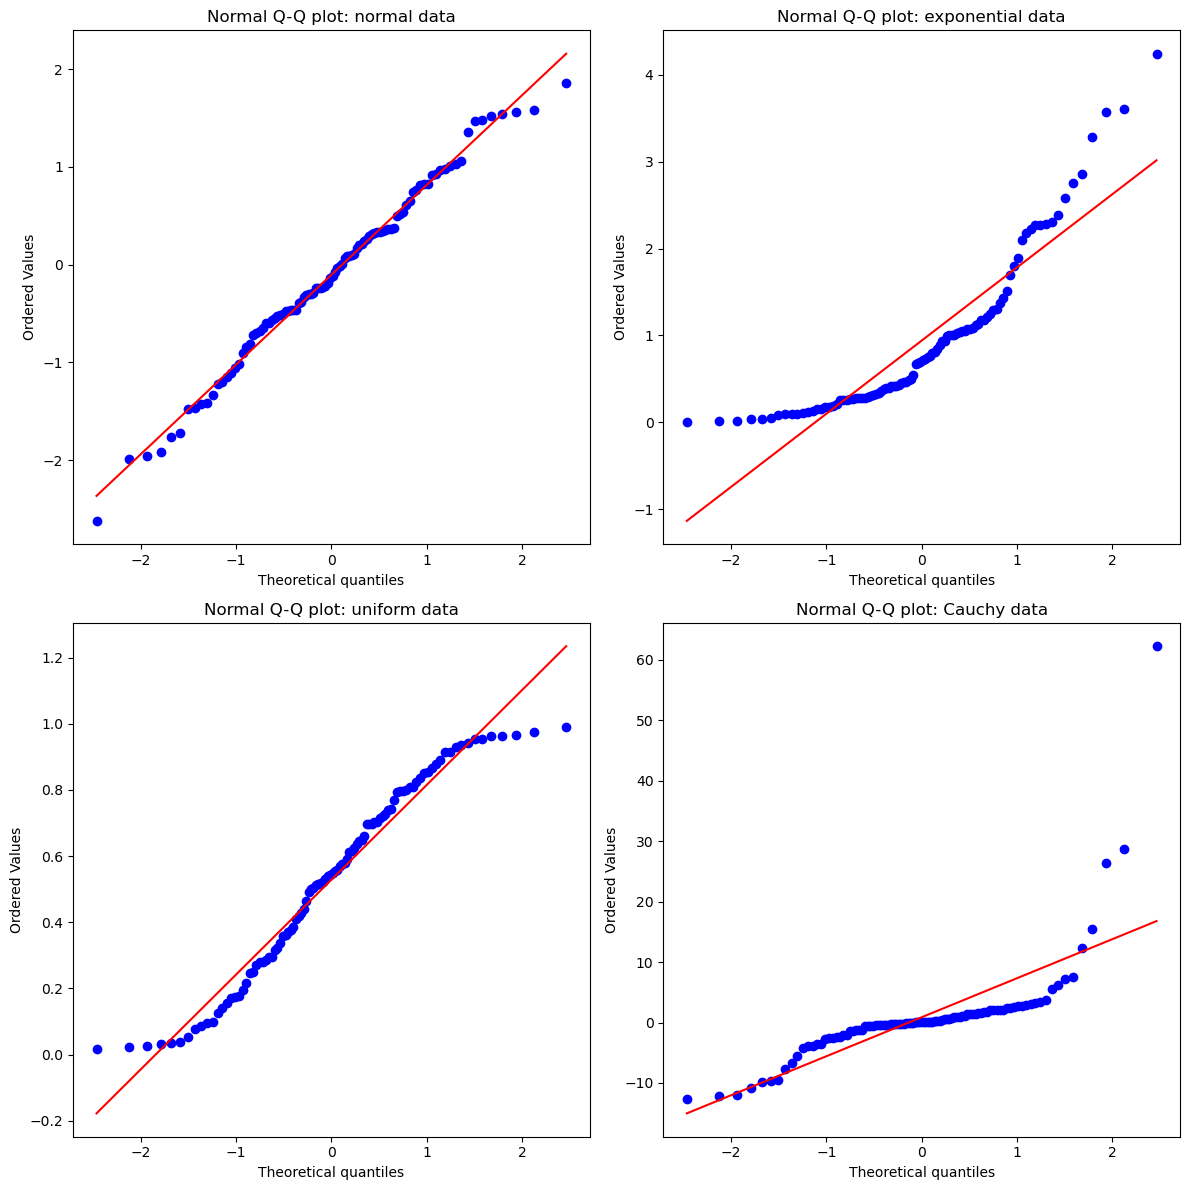

In [11]:
# Create basic comparison plots
create_multiple_qq_plots()

In [6]:

def create_qq_plots_varying_n(distribution='normal', sizes=[10, 20, 50, 100]):
    """
    Create Q-Q plots for different sample sizes.
    
    Parameters:
    -----------
    distribution : str
        Type of distribution ('normal', 'exponential', 'uniform', 'cauchy')
    sizes : list
        List of sample sizes to try
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    for i, n in enumerate(sizes):
        row = i // 2
        col = i % 2
        
        if distribution == 'normal':
            data = np.random.normal(0, 1, n)
        elif distribution == 'exponential':
            data = np.random.exponential(1, n)
        elif distribution == 'uniform':
            data = np.random.uniform(0, 1, n)
        elif distribution == 'cauchy':
            data = stats.t.rvs(df=1, size=n)
        
        stats.probplot(data, dist="norm", plot=axes[row, col])
        axes[row, col].set_title(f"n = {n}")
    
    plt.suptitle(f"Q-Q Plots for {distribution.capitalize()} Distribution\nVarying Sample Sizes")
    plt.tight_layout()
    plt.show()


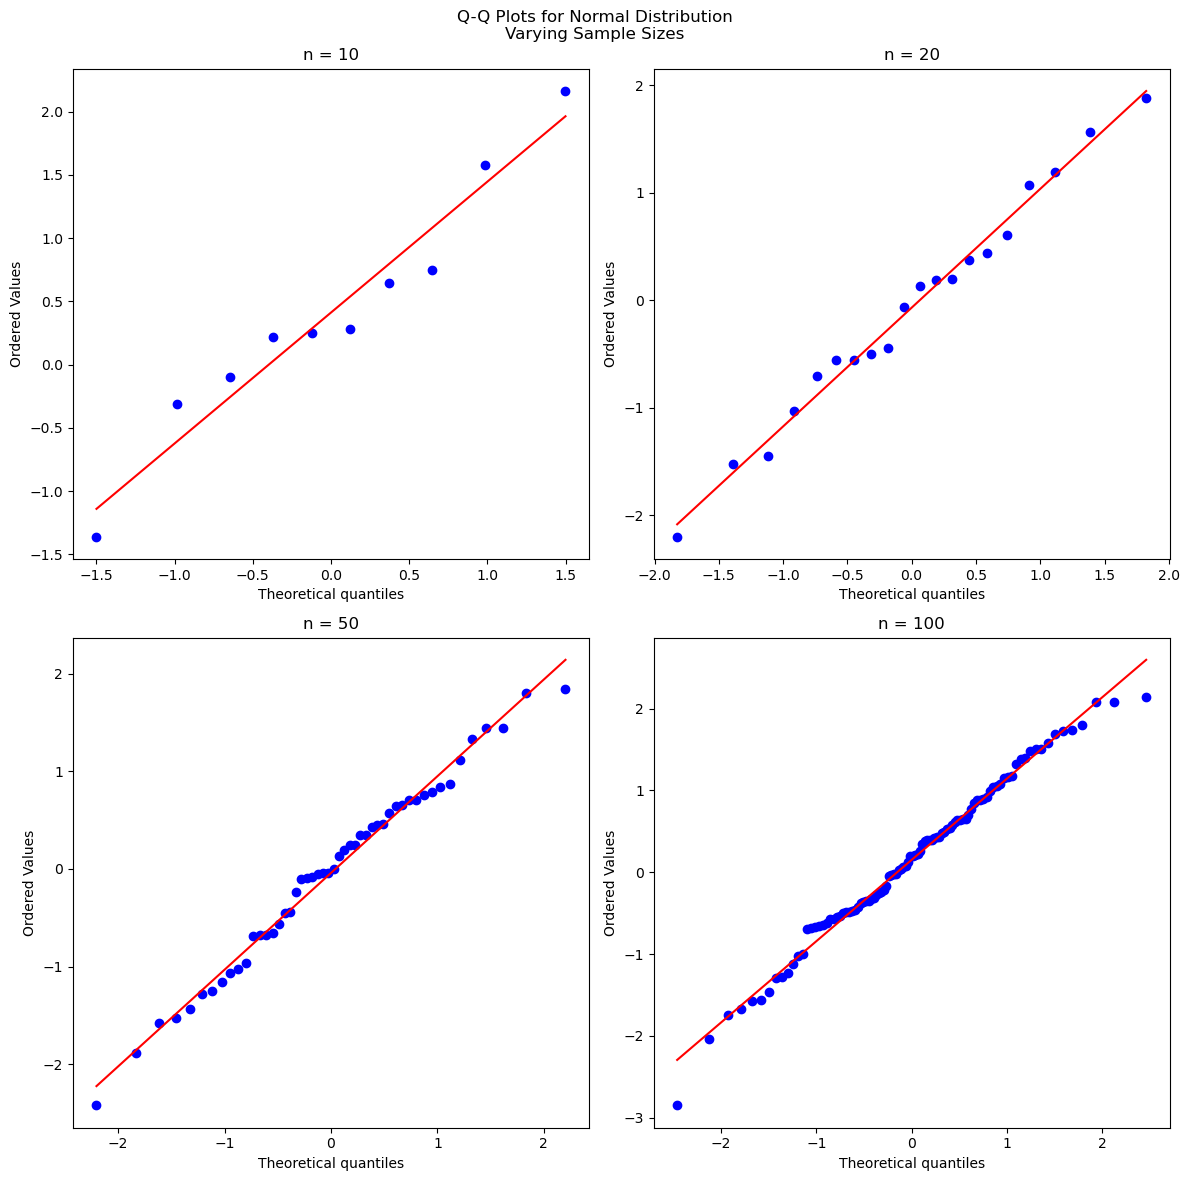

In [15]:
# Example of varying sample sizes for normal distribution
create_qq_plots_varying_n('normal', [10, 20, 50, 100])

In [7]:

def create_custom_qq_plot(data, plot_type='exponential', title=None):
    """
    Create custom Q-Q plots for exponential and Pareto distributions.
    
    Parameters:
    -----------
    data : array-like
        Input data
    plot_type : str
        'exponential' or 'pareto'
    title : str
        Plot title
    """
    n = len(data)
    k = np.arange(1, n + 1)
    
    plt.figure(figsize=(8, 6))
    
    if plot_type == 'exponential':
        x = -np.log(1 - k/(n + 1))
        y = np.sort(data)
        if title is None:
            title = "Exponential Q-Q Plot"
        ylabel = "Ordered data"
    else:  # Pareto
        x = -np.log(1 - k/(n + 1))
        y = np.sort(np.log(data))
        if title is None:
            title = "Pareto Q-Q Plot"
        ylabel = "log(Ordered data)"
    
    plt.scatter(x, y, alpha=0.6)
    plt.plot([min(x), max(x)], [min(y), max(y)], 'r--', alpha=0.8)
    
    plt.title(title)
    plt.xlabel("-log[1 - k/(n+1)]")
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.show()


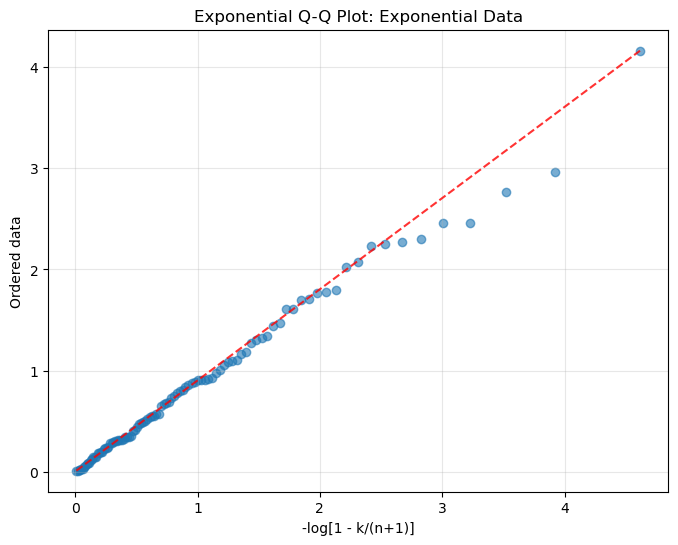

In [13]:

# Example with exponential data
n = 100
exp_data = np.random.exponential(1, n)
create_custom_qq_plot(exp_data, 'exponential', "Exponential Q-Q Plot: Exponential Data")





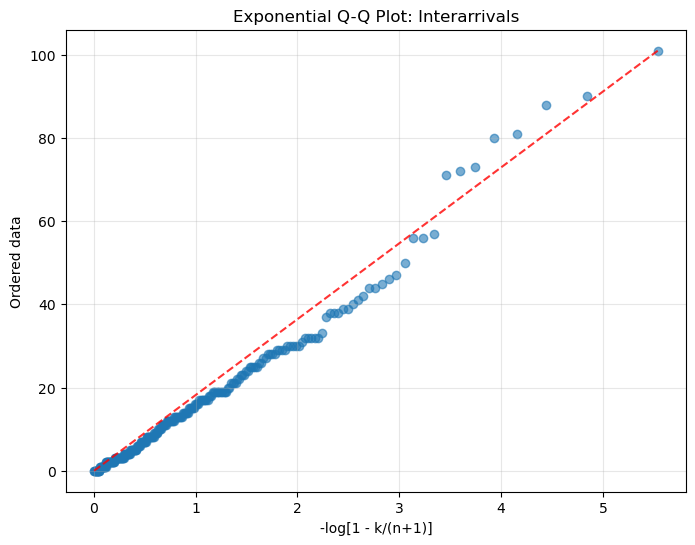

In [20]:
interarrivals = np.loadtxt("interarrivals.txt")
amounts = np.loadtxt("amounts.txt")
create_custom_qq_plot(interarrivals, 'exponential', "Exponential Q-Q Plot: Interarrivals")
# create_custom_qq_plot(amounts, 'pareto', "Pareto Q-Q Plot: Claim Amounts")


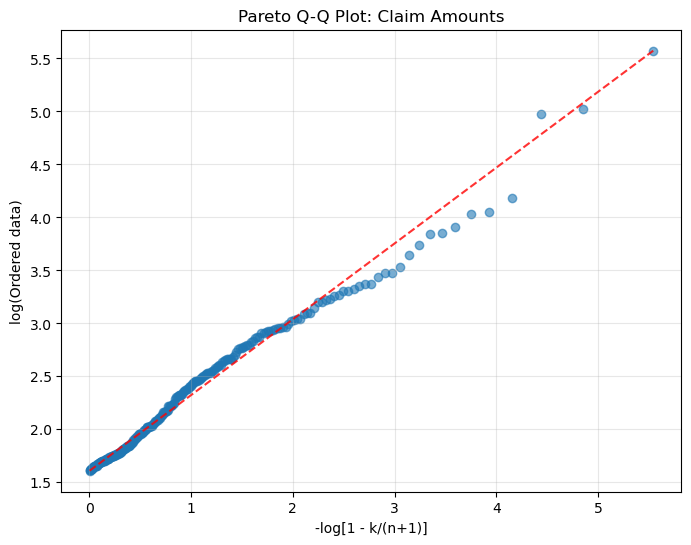

In [21]:
create_custom_qq_plot(amounts, 'pareto', "Pareto Q-Q Plot: Claim Amounts")

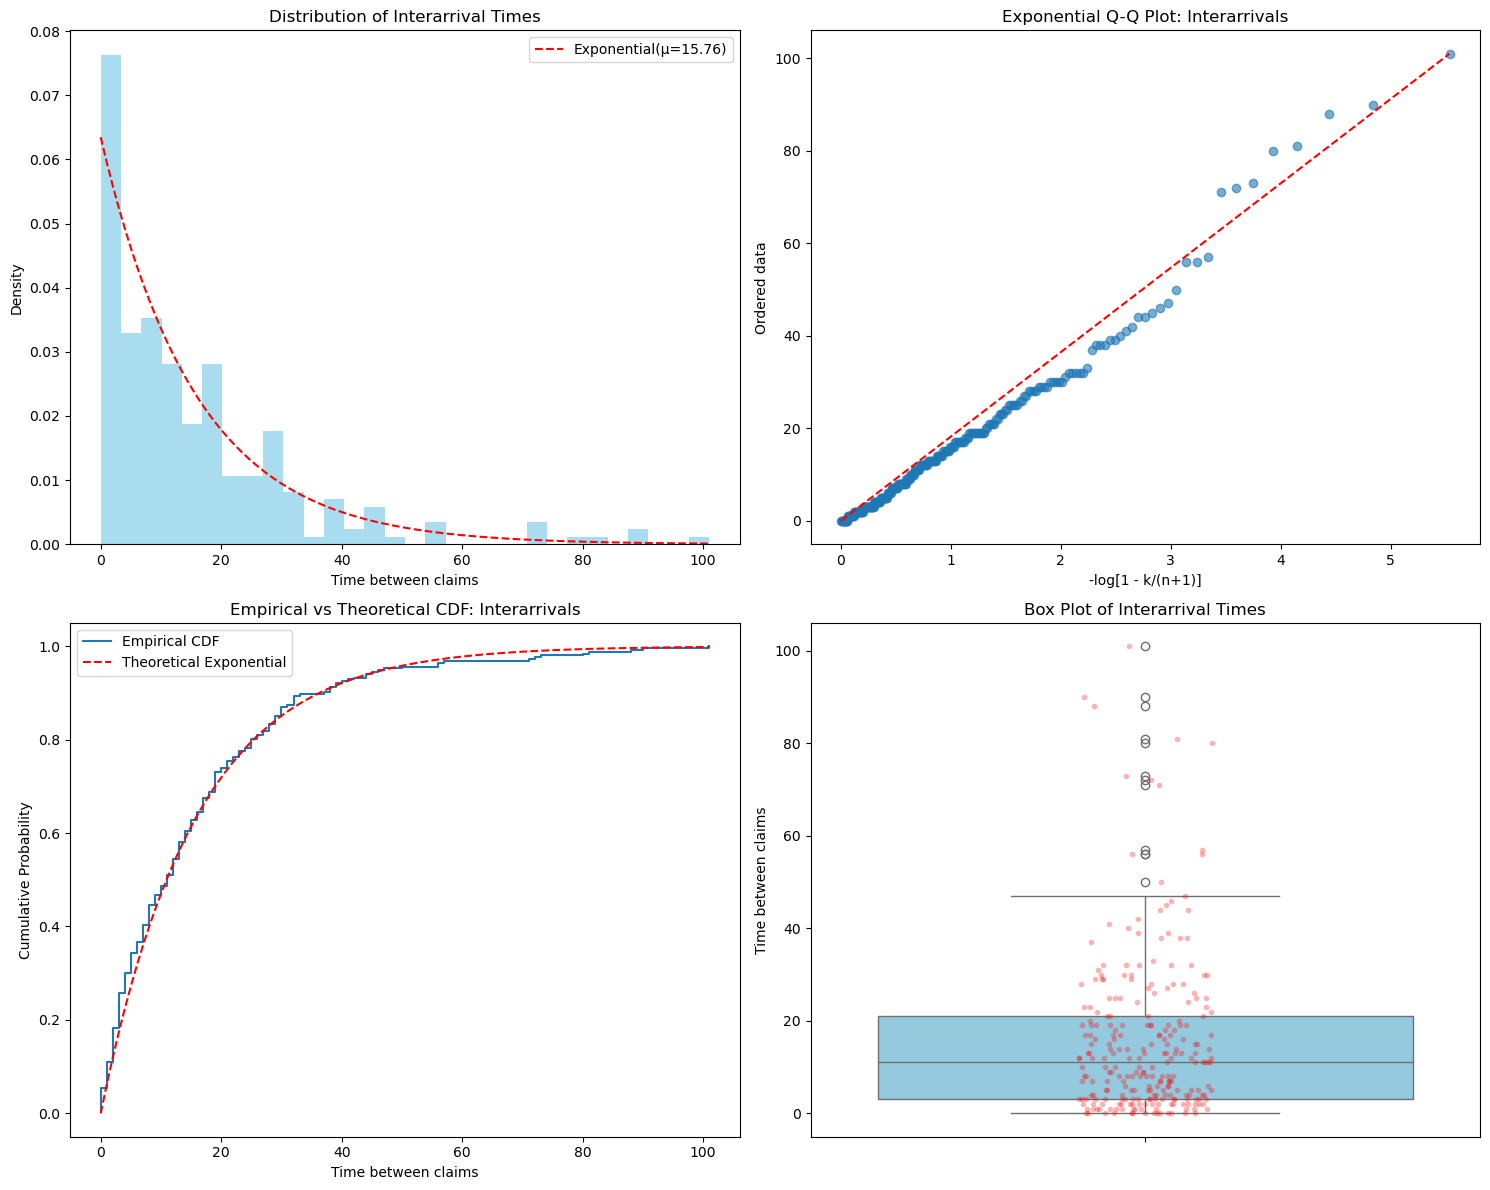

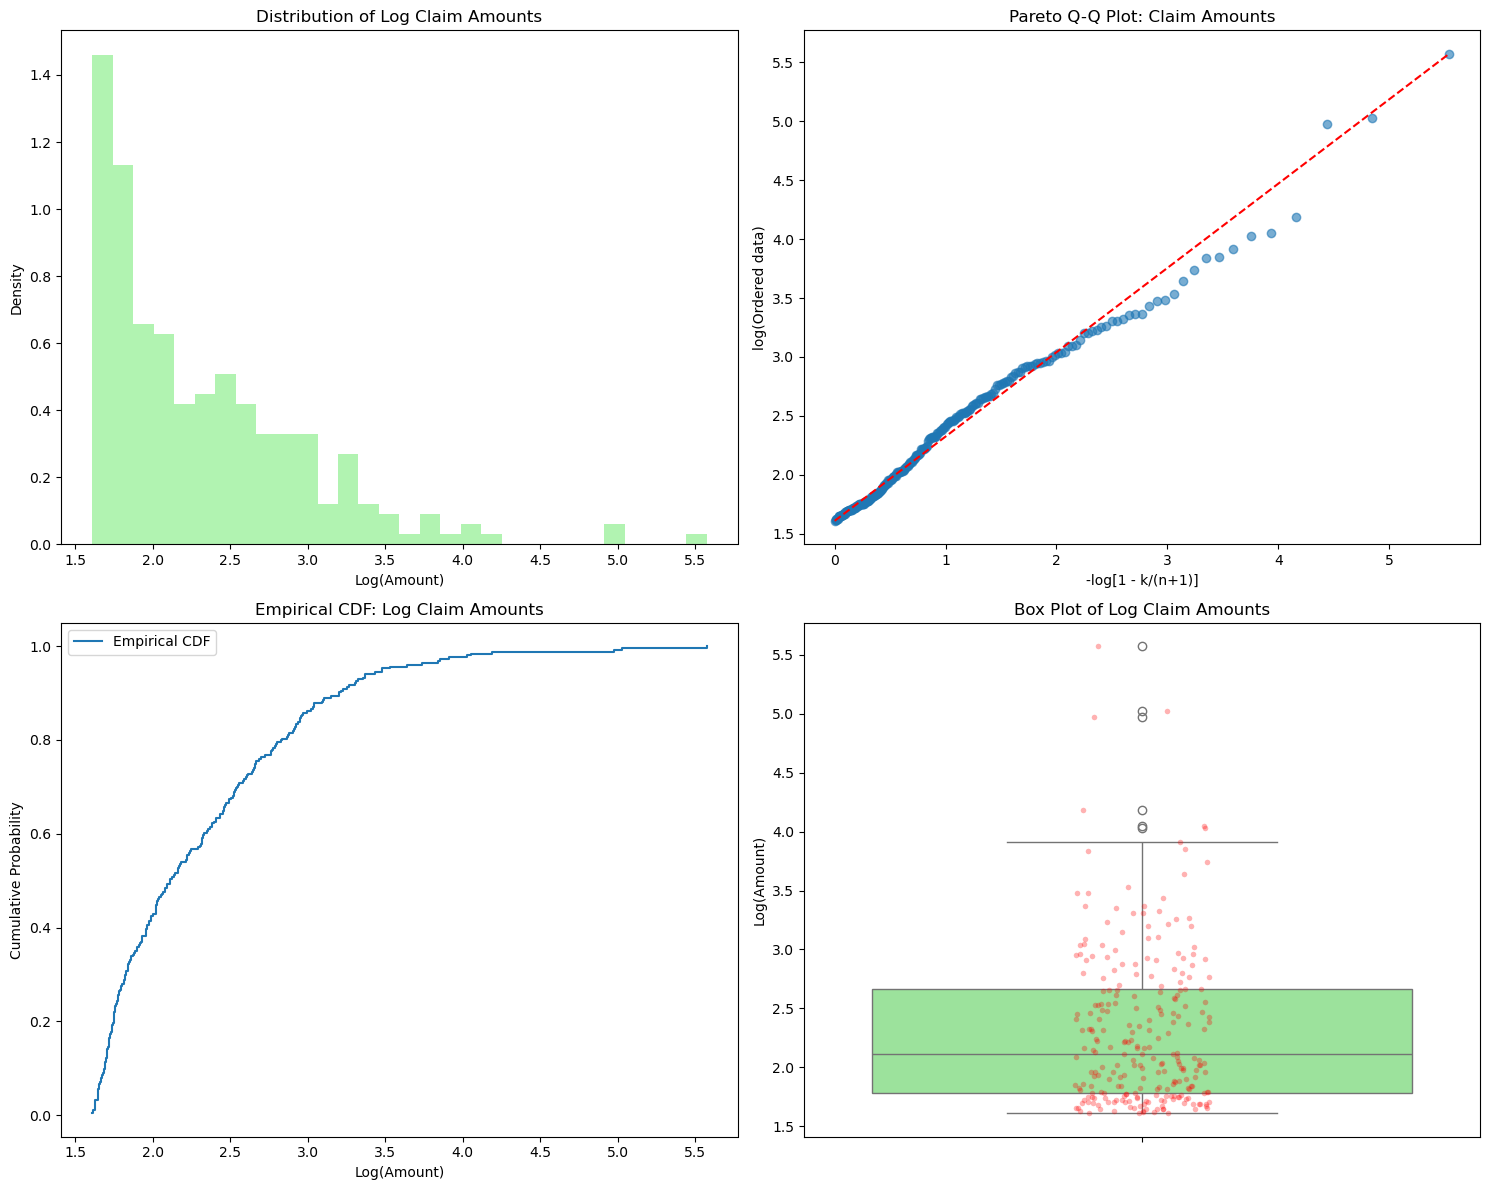


Interarrival Times Summary:
Mean: 15.76
Median: 11.00
Std Dev: 17.27
Skewness: 2.15

Claim Amounts Summary:
Mean: 14.07
Median: 8.25
Std Dev: 21.94
Skewness: 7.75


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def analyze_insurance_data(interarrivals, amounts):
    """
    Comprehensive analysis of insurance interarrival times and claim amounts
    """
    
    
    # 1. Interarrival Times Analysis
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1.1 Histogram with exponential fit
    mu_interarrival = np.mean(interarrivals)
    x_exp = np.linspace(0, max(interarrivals), 100)
    y_exp = stats.expon.pdf(x_exp, scale=mu_interarrival)
    
    ax1.hist(interarrivals, bins=30, density=True, alpha=0.7, color='skyblue')
    ax1.plot(x_exp, y_exp, 'r--', label=f'Exponential(μ={mu_interarrival:.2f})')
    ax1.set_title('Distribution of Interarrival Times')
    ax1.set_xlabel('Time between claims')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # 1.2 Exponential Q-Q plot
    k = np.arange(1, len(interarrivals) + 1)
    theoretical_quantiles = -np.log(1 - k/(len(interarrivals) + 1))
    
    ax2.scatter(theoretical_quantiles, np.sort(interarrivals), alpha=0.6)
    ax2.plot([0, max(theoretical_quantiles)], [0, max(interarrivals)], 'r--')
    ax2.set_title('Exponential Q-Q Plot: Interarrivals')
    ax2.set_xlabel('-log[1 - k/(n+1)]')
    ax2.set_ylabel('Ordered data')
    
    # 1.3 ECDF (fixed version)
    sorted_data = np.sort(interarrivals)
    n = len(sorted_data)
    cumprob = np.arange(1, n + 1) / n
    
    ax3.step(sorted_data, cumprob, label='Empirical CDF', where='post')
    ax3.plot(x_exp, stats.expon.cdf(x_exp, scale=mu_interarrival), 
            'r--', label='Theoretical Exponential')
    ax3.set_title('Empirical vs Theoretical CDF: Interarrivals')
    ax3.set_xlabel('Time between claims')
    ax3.set_ylabel('Cumulative Probability')
    ax3.legend()
    
    # 1.4 Box plot with points
    sns.boxplot(y=interarrivals, ax=ax4, color='skyblue')
    sns.stripplot(y=interarrivals, ax=ax4, color='red', alpha=0.3, size=4)
    ax4.set_title('Box Plot of Interarrival Times')
    ax4.set_ylabel('Time between claims')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Claim Amounts Analysis
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 2.1 Histogram of log amounts
    log_amounts = np.log(amounts)
    ax1.hist(log_amounts, bins=30, density=True, alpha=0.7, color='lightgreen')
    ax1.set_title('Distribution of Log Claim Amounts')
    ax1.set_xlabel('Log(Amount)')
    ax1.set_ylabel('Density')
    
    # 2.2 Pareto Q-Q plot
    k = np.arange(1, len(amounts) + 1)
    theoretical_quantiles = -np.log(1 - k/(len(amounts) + 1))
    
    ax2.scatter(theoretical_quantiles, np.log(np.sort(amounts)), alpha=0.6)
    ax2.plot([0, max(theoretical_quantiles)], 
             [min(log_amounts), max(log_amounts)], 'r--')
    ax2.set_title('Pareto Q-Q Plot: Claim Amounts')
    ax2.set_xlabel('-log[1 - k/(n+1)]')
    ax2.set_ylabel('log(Ordered data)')
    
    # 2.3 ECDF of log amounts (fixed version)
    sorted_log_data = np.sort(log_amounts)
    n = len(sorted_log_data)
    cumprob = np.arange(1, n + 1) / n
    
    ax3.step(sorted_log_data, cumprob, label='Empirical CDF', where='post')
    ax3.set_title('Empirical CDF: Log Claim Amounts')
    ax3.set_xlabel('Log(Amount)')
    ax3.set_ylabel('Cumulative Probability')
    ax3.legend()
    
    # 2.4 Box plot with points for log amounts
    sns.boxplot(y=log_amounts, ax=ax4, color='lightgreen')
    sns.stripplot(y=log_amounts, ax=ax4, color='red', alpha=0.3, size=4)
    ax4.set_title('Box Plot of Log Claim Amounts')
    ax4.set_ylabel('Log(Amount)')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nInterarrival Times Summary:")
    print(f"Mean: {np.mean(interarrivals):.2f}")
    print(f"Median: {np.median(interarrivals):.2f}")
    print(f"Std Dev: {np.std(interarrivals):.2f}")
    print(f"Skewness: {stats.skew(interarrivals):.2f}")
    
    print("\nClaim Amounts Summary:")
    print(f"Mean: {np.mean(amounts):.2f}")
    print(f"Median: {np.median(amounts):.2f}")
    print(f"Std Dev: {np.std(amounts):.2f}")
    print(f"Skewness: {stats.skew(amounts):.2f}")

# Load and analyze data
interarrivals = np.loadtxt("interarrivals.txt")
amounts = np.loadtxt("amounts.txt")
analyze_insurance_data(interarrivals, amounts)